# Ejercicios de Programación lineal

#### Plantee el problema en celdas de `Markdown` y resuelva usando la función `linprog` de la librería `SciPy`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import optimize as opt

1. Una fábrica produce focos incandesentes y los vende a 4.5 u.m., además de focos ahorradores que vende a 6 u.m. cada uno. La producción está limitada a 400 focos incandesentes y 300 focos ahorradores al día, además de no poder producir más de 500 focos en total.

Si la fábrica vende toda su producción, determina cuántos focos incandesentes y cuántos focos ahorradores debe producir para obtener los máximos ingresos posibles y cuáles serían éstos.

### Organizamos:
            Foco normal(x1)     Foco ahorrador(x2)      Total de focos producidos al dia
Utilidad.............................................4.5....................6.............................---

Prodc. por........................................400...................300............................500
dia

#### Formulamos el problema: Maximizamos ingresos

#### Identificamos variable

Focos producidos normales ---> x

Focos producidos ahorradores ---> y

#### Determinar restricciones 

x + y < 500

0 < x < 400

0 < y < 300




#### Determinar la función objeto

f(x,y) = 4.5x + 6y

In [85]:
c = -np.array([4.5, 6])
A_ineq = np.array([[1, 0],
                  [0, 1],
                  [1, 1]])
b_ineq = np.array([400, 300, 500])

In [86]:
solucion = opt.linprog(c=c, A_ub=A_ineq, b_ub=b_ineq)

In [87]:
solucion

     con: array([], dtype=float64)
     fun: -2699.9999998245994
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([2.00000000e+02, 2.26223165e-08, 3.14371391e-08])
  status: 0
 success: True
       x: array([199.99999999, 299.99999998])

#### Vértices de la región factible

A(0, 300); B(200, 300); C(400, 100); D(400, 0); E(0, 0)

 #### Conclusión
 
 Debe vender 200 focos normales y 300 focos ahorradores para tener los mejores ingresos que serían $2700.
 

In [ ]:
-----------------------------------------------------------------------------------------------------------------------

2. Un frutero necesita 16 cajas de naranjas, 5 de plátanos y 20 de manzanas. Dos mayoristas pueden suministrarle para satisfacer sus necesidades, pero sólo venden la fruta en contenedores completos. El mayorista A envía en cada contenedor 8 cajas de naranjas, 1 de plátanos y 2 de manzanas. El mayorista B envía en cada contenedor 2 cajas de naranjas, una de plátanos y 7 de manzanas. Sabiendo que cada contenedor del mayorista A tiene un costo de 150 u.m. y el contenedor del mayorista B de 300 u.m., calcular cuántos contenedores habrá de comprar a cada mayorista, con objeto de reducir al mínimo el costo de lo solicitado.

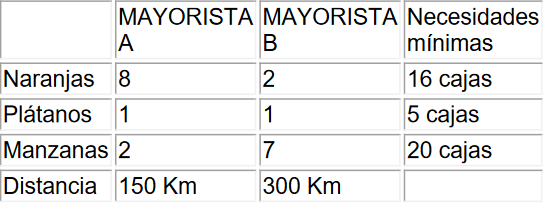

#### Variables inumerables 

Llamamos x al número de contenedores del mayorista A

Llamamos y al número de contenedores del mayorista B

#### Función objetivo

f(x)= 150x + 300y

#### Determinar restricciones 

8x+2y >= 16

x+y >= 5

2x+7y >= 20

x >= 0, y >= 0

In [100]:
c = -np.array([150, 300])
A_ineq = np.array([[8, 2],
                   [1, 1],
                   [2, 7]])
b_ineq = np.array([16, 5, 20])

In [101]:
solucion = opt.linprog(c=c, A_ub=A_ineq, b_ub=b_ineq)

In [102]:
solucion

     con: array([], dtype=float64)
     fun: -946.1538461526673
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1.30064848e-11, 1.15384615e+00, 2.64037681e-11])
  status: 0
 success: True
       x: array([1.38461538, 2.46153846])

In [110]:
def f1(x1):
    return (16-8*x1)/2
def f2(x1):
    return 5-x1
def f3(x1):
    return (20-2*x1)/7

In [111]:
x1 = np.linspace(0, 100)
y1 = f1(x1)
y2 = f2(x1)
y3 = f3(x1)

(0.0, 5.0, 0.0, 7.0)

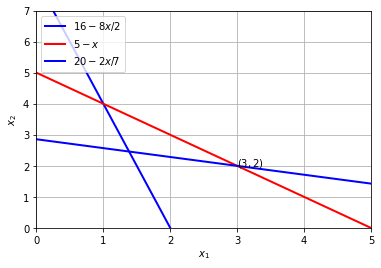

In [114]:
plt.figure(figsize=(6, 4))
plt.plot(x1, y1, 'b', lw=2, label='$16-8x/2$')
plt.plot(x1, y2, 'r', lw=2, label='$5-x$')
plt.plot(x1, y3, 'b', lw=2, label='$20-2x/7$')

plt.text(3, 2, '$(3, 2)$')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.legend(loc=2)
plt.axis([0, 5, 0, 7])

#### Solución factible óptima (mínima)

El frutero solicitará 3 contenedores del mayorista A y 2 contenedores del
mayorista B